In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For some applications (like data visualization) we will want information to be verticalized, so we can filter on column values
# the typical example here is the calendar

data = pd.read_excel('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY2/3.04 melt, pivot and pivot_table/Total_sales_month.xls')
data.head()
#We may want to filter by month, for example, or by quarter, or group by month, or sum all Januaries in a decade. All of these are easier to do if the months are in a column than accross multiple

,Product Name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Bush Somerset Collection Bookcase,1077,1110,1198,1143,1227,1128,1127,1095,1090,1129,1171,1291
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1177,1098,1181,1207,1287,1206,1120,1108,1121,1217,1223,1280
2,Self-Adhesive Address Labels for Typewriters b...,802,734,678,726,782,697,681,583,643,657,729,869
3,Bretford CR4500 Series Slim Rectangular Table,983,1041,1122,1085,1028,979,959,886,945,989,989,1117
4,Eldon Fold 'N Roll Cart System,1136,1115,1087,1093,1142,1056,1002,902,988,1014,1048,1051


In [ ]:
data.shape

(1841, 13)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pd.melt( data to melt, columns to keep) -> From rows to columns
verticalized = pd.melt(data,id_vars=['Product Name'])
verticalized.head(24)
verticalized = verticalized.rename(columns={'variable':'month','value':'Sales'})
verticalized.columns = ['Product Name','month','Sales']
display(verticalized.head())
display(verticalized.tail())

,Product Name,month,Sales
0,Bush Somerset Collection Bookcase,Jan,1077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983
4,Eldon Fold 'N Roll Cart System,Jan,1136


,Product Name,month,Sales
22087,RCA ViSYS 25425RE1 Corded phone,Dec,1105
22088,Cisco 8961 IP Phone Charcoal,Dec,1033
22089,"Eureka Hand Vacuum, Bagless",Dec,998
22090,LG G2,Dec,1471
22091,Eldon Jumbo ProFile Portable File Boxes Graphi...,Dec,831


In [ ]:
verticalized.to_excel('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY2/3.04 melt, pivot and pivot_table/verticalized_products.xls', 
                      engine="openpyxl", index=False)

In [ ]:
# try to plot the evolution of customizable portfolios of stocks from the file 'stock_prices_1yr.xls' 

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY2/3.04 melt, pivot and pivot_table/Stock_prices_1yr.xls')
data.tail()

,Date,TSW,FGU,KTRF,KTF,LET,NWQ,OTP,CQR,OFT,PLM,JTF,XKS,OTF,MNT,PLT,NYA,LLC,MTO,PLR
726,2020-12-27,69.614851,72.013312,49.292866,70.935484,92.076248,52.617125,107.673831,79.020777,34.933314,56.587607,84.454529,85.629225,118.203039,86.392084,110.073176,48.058646,50.970187,39.663864,64.248781
727,2020-12-28,69.176277,71.703655,49.135129,70.502777,91.450129,52.722360,106.866277,79.550216,34.611928,56.502726,84.733229,84.901377,119.255047,87.135056,110.832681,47.775100,50.873344,39.858217,64.088159
728,2020-12-29,69.529076,72.406351,48.899280,70.206666,91.322099,52.337486,106.716664,79.327476,34.615389,56.378420,84.589182,85.572098,119.934800,86.681954,110.788348,47.641330,50.852995,39.921990,64.049706
729,2020-12-30,69.264866,72.594607,48.762362,70.641947,90.883753,52.646277,107.335621,79.827239,34.899235,56.784344,85.037505,85.264038,119.694931,87.202046,110.455983,47.808074,51.056407,39.914005,64.120161
730,2020-12-31,69.008586,73.153586,49.245109,71.185890,90.074888,52.888450,107.990368,80.585598,34.654940,56.608313,85.190572,85.937624,119.180243,87.341569,109.859521,48.214443,51.122780,40.013790,64.729302


In [ ]:
data.shape

(731, 20)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

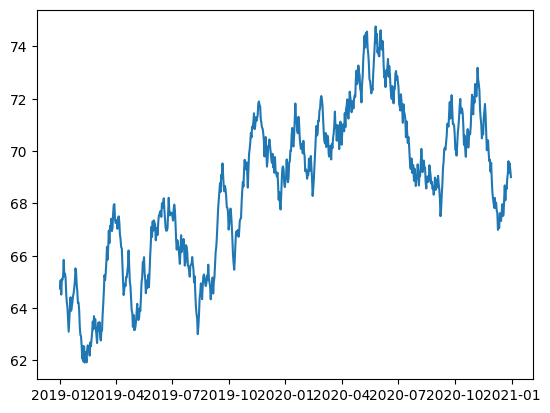

In [ ]:
plt.plot(data['Date'],data['TSW']); # have to use stock name as a column name here
# import matplotlib.ticket 

In [ ]:
verticalized = pd.melt(data,id_vars=['Date']) # prefer to use stock name as something we can select on
display(verticalized.head())
#display(verticalized.tail())

,Date,variable,value
0,2019-01-01,TSW,64.749100
1,2019-01-02,TSW,65.066371
2,2019-01-03,TSW,64.519813
3,2019-01-04,TSW,65.106943
4,2019-01-05,TSW,65.080901


In [ ]:
# Pivoting is the inverse of melting.
# When you melt you turn multiple column names into the values of a single column
# When you pivot you turn the values of a column into new column names
superstore_products = pd.read_excel('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY2/3.04 melt, pivot and pivot_table/verticalized_products.xls')
superstore_products.head()

,Product Name,month,Sales
0,Bush Somerset Collection Bookcase,Jan,1077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983
4,Eldon Fold 'N Roll Cart System,Jan,1136


In [ ]:
# Pivot function is opposite to melt.
# The syntax is 
# in the index argument you put the columns you want to keep
# in the columns argument you put the columns whose values you want to make into columns
dataset=superstore_products.pivot(index='Product Name',columns='month').reset_index()
dataset.head()

Product Name Sales              \
month                                                      Apr   Aug   Dec   
0      "While you Were Out" Message Book, One Form pe...   976   939  1092   
1               #10 Gummed Flap White Envelopes, 100/Box  1121   922  1242   
2                          #10 Self-Seal White Envelopes  1632  1574  1656   
3             #10 White Business Envelopes,4 1/8 x 9 1/2  1132   959  1092   
4                #10- 4 1/8" x 9 1/2" Recycled Envelopes   806   628   859   

                                                             
month   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct   Sep  
0       909   913   990  1015   916  1045  1055   971   951  
1      1167  1172  1016  1008  1074  1094  1111  1077  1000  
2      1477  1497  1641  1676  1535  1732  1654  1658  1649  
3      1244  1196  1008  1020  1186  1081  1014   959   954  
4       720   783   723   751   772   806   723   716   701

In [ ]:
dataset.columns

MultiIndex([('Product Name',    ''),
            (       'Sales', 'Apr'),
            (       'Sales', 'Aug'),
            (       'Sales', 'Dec'),
            (       'Sales', 'Feb'),
            (       'Sales', 'Jan'),
            (       'Sales', 'Jul'),
            (       'Sales', 'Jun'),
            (       'Sales', 'Mar'),
            (       'Sales', 'May'),
            (       'Sales', 'Nov'),
            (       'Sales', 'Oct'),
            (       'Sales', 'Sep')],
           names=[None, 'month'])

In [ ]:
dataset[("Sales","Aug")]

0        939
1        922
2       1574
3        959
4        628
        ... 
1836     543
1837     790
1838    1050
1839     774
1840    1030
Name: (Sales, Aug), Length: 1841, dtype: int64

In [ ]:
dataset.columns

MultiIndex([('Product Name',    ''),
            (       'Sales', 'Apr'),
            (       'Sales', 'Aug'),
            (       'Sales', 'Dec'),
            (       'Sales', 'Feb'),
            (       'Sales', 'Jan'),
            (       'Sales', 'Jul'),
            (       'Sales', 'Jun'),
            (       'Sales', 'Mar'),
            (       'Sales', 'May'),
            (       'Sales', 'Nov'),
            (       'Sales', 'Oct'),
            (       'Sales', 'Sep')],
           names=[None, 'month'])

In [ ]:
# using an aggregate column index:
dataset[[('Product Name', ''),('Sales','Jan'),('Sales','Feb'),('Sales','Mar')]]

Product Name Sales            
month                                                      Jan   Feb   Mar
0      "While you Were Out" Message Book, One Form pe...   913   909   916
1               #10 Gummed Flap White Envelopes, 100/Box  1172  1167  1074
2                          #10 Self-Seal White Envelopes  1497  1477  1535
3             #10 White Business Envelopes,4 1/8 x 9 1/2  1196  1244  1186
4                #10- 4 1/8" x 9 1/2" Recycled Envelopes   783   720   772
...                                                  ...   ...   ...   ...
1836   iKross Bluetooth Portable Keyboard + Cell Phon...   792   727   819
1837                          iOttie HLCRIO102 Car Mount  1054  1009   941
1838                                 iOttie XL Car Mount  1071  1085  1161
1839   invisibleSHIELD by ZAGG Smudge-Free Screen Pro...   795   847   846
1840                  netTALK DUO VoIP Telephone Service  1137  1212  1259

[1841 rows x 4 columns]

In [ ]:
# you can have more than one remaining columns, but that will generate a multi-index
superstore_products['Sales (k)'] = superstore_products['Sales']/1000
superstore_products.head()

,Product Name,month,Sales,Sales (k)
0,Bush Somerset Collection Bookcase,Jan,1077,1.077
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jan,1177,1.177
2,Self-Adhesive Address Labels for Typewriters b...,Jan,802,0.802
3,Bretford CR4500 Series Slim Rectangular Table,Jan,983,0.983
4,Eldon Fold 'N Roll Cart System,Jan,1136,1.136


In [ ]:
superstore_products.pivot(index='Product Name',columns='month').head()
# this multi index stuff looks complicated but really is not. The column names are now
# ('Sales','Jan')...('Sales','Dec'),('Sales (k)','Jan'),...,('Sales (k)','Dec')

Sales                    \
month                                                Apr   Aug   Dec   Feb   
Product Name                                                                 
"While you Were Out" Message Book, One Form per...   976   939  1092   909   
#10 Gummed Flap White Envelopes, 100/Box            1121   922  1242  1167   
#10 Self-Seal White Envelopes                       1632  1574  1656  1477   
#10 White Business Envelopes,4 1/8 x 9 1/2          1132   959  1092  1244   
#10- 4 1/8" x 9 1/2" Recycled Envelopes              806   628   859   720   

                                                                            \
month                                                Jan   Jul   Jun   Mar   
Product Name                                                                 
"While you Were Out" Message Book, One Form per...   913   990  1015   916   
#10 Gummed Flap White Envelopes, 100/Box            1172  1016  1008  1074   
#10 Self-Seal White Envelopes                       1497  1641  1676  1535   
#10 White Business Envelopes,4 1/8 x 9 1/2          1196  1008  1020  1186   
#10- 4 1/8" x 9 1/2" Recycled Envelopes              783   723   751   772   

                                                                ... Sales (k)  \
month                                                May   Nov  ...       Dec   
Product Name                                                    ...             
"While you Were Out" Message Book, One Form per...  1045  1055  ...     1.092   
#10 Gummed Flap White Envelopes, 100/Box            1094  1111  ...     1.242   
#10 Self-Seal White Envelopes                       1732  1654  ...     1.656   
#10 White Business Envelopes,4 1/8 x 9 1/2          1081  1014  ...     1.092   
#10- 4 1/8" x 9 1/2" Recycled Envelopes              806   723  ...     0.859   

                                                                         \
month                                                 Feb    Jan    Jul   
Product Name                                                              
"While you Were Out" Message Book, One Form per...  0.909  0.913  0.990   
#10 Gummed Flap White Envelopes, 100/Box            1.167  1.172  1.016   
#10 Self-Seal White Envelopes                       1.477  1.497  1.641   
#10 White Business Envelopes,4 1/8 x 9 1/2          1.244  1.196  1.008   
#10- 4 1/8" x 9 1/2" Recycled Envelopes             0.720  0.783  0.723   

                                                                         \
month                                                 Jun    Mar    May   
Product Name                                                              
"While you Were Out" Message Book, One Form per...  1.015  0.916  1.045   
#10 Gummed Flap White Envelopes, 100/Box            1.008  1.074  1.094   
#10 Self-Seal White Envelopes                       1.676  1.535  1.732   
#10 White Business Envelopes,4 1/8 x 9 1/2          1.020  1.186  1.081   
#10- 4 1/8" x 9 1/2" Recycled Envelopes             0.751  0.772  0.806   

                                                                         
month                                                 Nov    Oct    Sep  
Product Name                                                             
"While you Were Out" Message Book, One Form per...  1.055  0.971  0.951  
#10 Gummed Flap White Envelopes, 100/Box            1.111  1.077  1.000  
#10 Self-Seal White Envelopes                       1.654  1.658  1.649  
#10 White Business Envelopes,4 1/8 x 9 1/2          1.014  0.959  0.954  
#10- 4 1/8" x 9 1/2" Recycled Envelopes             0.723  0.716  0.701  

[5 rows x 24 columns]

In [ ]:
superstore_products.columns

Index(['Product Name', 'month', 'Sales', 'Sales (k)'], dtype='object')

In [ ]:
# However, most times you are not going to be pivoting tables that have been melted, 
# that is just too convenient
# For example, in the table above, what would happen if you had 2 lines with the same product and month, but different values?
# In other words, how does pivoting work in "regular" dataframes? 
# For those we have pivot_tables, who automatically do aggregations on your data

In [ ]:
superstore = pd.read_excel('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY2/3.04 melt, pivot and pivot_table/Sample - Superstore.xls')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
pd.__version__

'1.4.4'

In [ ]:
#!pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Let's make "Category" into an index, there are plenty of repetitions of those
superstore.pivot_table(index=['Category'])
#superstore.pivot_table(index= ['Category'], sort=False)
#superstore.groupby(['Category']).agg({'Discount': 'mean',...})

# we can see that:
# pandas did a group by Category
# it kept only the numeric columns
# he aggregated the results for those with the mean, which is his default aggregation

,Discount,Postal Code,Profit,Quantity,Row ID,Sales
Category,,,,,,
Furniture,0.173923,55726.556341,8.699327,3.785007,5041.643564,349.834887
Office Supplies,0.157285,54890.951211,20.327050,3.801195,4980.175075,119.324101
Technology,0.132323,55551.572279,78.752002,3.756903,5003.331890,452.709276


In [ ]:
# we can also add an index to columns, like in standard pivot
superstore.pivot_table(index=['Category'],columns=['Region'])
#superstore.groupby(['Category','Region']).agg({'Discount':'mean','Postal Code':'mean'})

Discount                                 Postal Code  \
Region            Central      East     South      West       Central   
Category                                                                
Furniture        0.297380  0.154077  0.121536  0.131400  65486.453222   
Office Supplies  0.252743  0.142932  0.167437  0.093358  65275.734880   
Technology       0.133095  0.143364  0.107850  0.133890  65393.026190   

                                                              Profit  \
Region                   East         South          West    Central   
Category                                                               
Furniture        17317.247920  34552.117470  91680.442716  -5.968918   
Office Supplies  17401.548481  34243.389950  91769.716921   6.244712   
Technology       18640.338318  35261.351536  91543.449082  80.231981   

                            ...  Quantity                 Row ID               \
Region                East  ...     South      West      Central         East   
Category                    ...                                                 
Furniture         5.068496  ...  3.888554  3.813296  5198.831601  4976.960067   
Office Supplies  23.957114  ...  3.819095  3.813917  5025.764416  4926.139019   
Technology       88.714084  ...  3.815700  3.898164  4854.019048  4951.805607   

                                                Sales                          \
Region                 South         West     Central        East       South   
Category                                                                        
Furniture        5019.783133  4999.953324  340.534644  346.574383  353.309289   
Office Supplies  5105.296482  4929.139694  117.458801  120.044425  126.282727   
Technology       5006.679181  5152.409015  405.753124  495.278469  507.753952   

                             
Region                 West  
Category                     
Furniture        357.302325  
Office Supplies  116.422377  
Technology       420.687533  

[3 rows x 24 columns]

In [ ]:
# Or we can do the same pivot all in the rows
superstore.pivot_table(index= ['Category','Region'])
#superstore.groupby(['Category','Region']).agg({'Discount':'mean','Postal Code':'mean','Profit':'mean',
#                                               'Quantity':'mean','Row ID':'mean','Sales':'mean'})

Discount   Postal Code     Profit  Quantity  \
Category        Region                                                 
Furniture       Central  0.297380  65486.453222  -5.968918  3.798337   
                East     0.154077  17317.247920   5.068496  3.683860   
                South    0.121536  34552.117470  20.395199  3.888554   
                West     0.131400  91680.442716  16.272914  3.813296   
Office Supplies Central  0.252743  65275.734880   6.244712  3.803797   
                East     0.142932  17401.548481  23.957114  3.774533   
                South    0.167437  34243.389950  20.086827  3.819095   
                West     0.093358  91769.716921  27.733183  3.813917   
Technology      Central  0.133095  65393.026190  80.231981  3.676190   
                East     0.143364  18640.338318  88.714084  3.629907   
                South    0.107850  35261.351536  68.231506  3.815700   
                West     0.133890  91543.449082  73.962687  3.898164   

                              Row ID       Sales  
Category        Region                            
Furniture       Central  5198.831601  340.534644  
                East     4976.960067  346.574383  
                South    5019.783133  353.309289  
                West     4999.953324  357.302325  
Office Supplies Central  5025.764416  117.458801  
                East     4926.139019  120.044425  
                South    5105.296482  126.282727  
                West     4929.139694  116.422377  
Technology      Central  4854.019048  405.753124  
                East     4951.805607  495.278469  
                South    5006.679181  507.753952  
                West     5152.409015  420.687533

In [ ]:
# tip: you can get rid of the multi-index with .reset_index()
superstore.pivot_table(index= ['Category','Region']).reset_index()

,Category,Region,Discount,Postal Code,Profit,Quantity,Row ID,Sales
0,Furniture,Central,0.297380,65486.453222,-5.968918,3.798337,5198.831601,340.534644
1,Furniture,East,0.154077,17317.247920,5.068496,3.683860,4976.960067,346.574383
2,Furniture,South,0.121536,34552.117470,20.395199,3.888554,5019.783133,353.309289
3,Furniture,West,0.131400,91680.442716,16.272914,3.813296,4999.953324,357.302325
4,Office Supplies,Central,0.252743,65275.734880,6.244712,3.803797,5025.764416,117.458801
5,Office Supplies,East,0.142932,17401.548481,23.957114,3.774533,4926.139019,120.044425
6,Office Supplies,South,0.167437,34243.389950,20.086827,3.819095,5105.296482,126.282727
7,Office Supplies,West,0.093358,91769.716921,27.733183,3.813917,4929.139694,116.422377
8,Technology,Central,0.133095,65393.026190,80.231981,3.676190,4854.019048,405.753124
9,Technology,East,0.143364,18640.338318,88.714084,3.629907,4951.805607,495.278469


In [ ]:
#you can select only a subset of columns to keep the values of
superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'])

Profit       Sales
Category        Region                        
Furniture       Central  -5.968918  340.534644
                East      5.068496  346.574383
                South    20.395199  353.309289
                West     16.272914  357.302325
Office Supplies Central   6.244712  117.458801
                East     23.957114  120.044425
                South    20.086827  126.282727
                West     27.733183  116.422377
Technology      Central  80.231981  405.753124
                East     88.714084  495.278469
                South    68.231506  507.753952
                West     73.962687  420.687533

In [ ]:
# and you can pick one or more aggregations
#superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'], aggfunc = ['sum','mean'])
#superstore.groupby(['Category','Region']).agg({'Sales':sum,'Profit':np.mean})
superstore.pivot_table(index= ['Category','Region'], values = ['Sales','Profit'], aggfunc = {'Sales':'sum','Profit':'mean'})

Profit        Sales
Category        Region                         
Furniture       Central  -5.968918  163797.1638
                East      5.068496  208291.2040
                South    20.395199  117298.6840
                West     16.272914  252612.7435
Office Supplies Central   6.244712  167026.4150
                East     23.957114  205516.0550
                South    20.086827  125651.3130
                West     27.733183  220853.2490
Technology      Central  80.231981  170416.3120
                East     88.714084  264973.9810
                South    68.231506  148771.9080
                West     73.962687  251991.8320

In [ ]:
# finally, we have only been using numeric aggregations, therefore only numeric columns show up 
# but if you use aggregations that work on other datatypes, they are also output
superstore.pivot_table(index= ['Category','Region'], aggfunc = ['max','mean']).head(5)

max                             \
                                City        Country Customer ID   
Category        Region                                            
Furniture       Central    Woodstock  United States    ZD-21925   
                East            York  United States    YC-21895   
                South         Wilson  United States    ZD-21925   
                West     Westminster  United States    ZC-21910   
Office Supplies Central    Woodstock  United States    ZC-21910   

                                                                 \
                              Customer Name Discount Order Date   
Category        Region                                            
Furniture       Central  Zuschuss Donatelli     0.60 2017-12-28   
                East         Yoseph Carroll     0.50 2017-12-30   
                South    Zuschuss Donatelli     0.45 2017-12-29   
                West       Zuschuss Carroll     0.70 2017-12-29   
Office Supplies Central    Zuschuss Carroll     0.80 2017-12-30   

                                                                      \
                               Order ID Postal Code       Product ID   
Category        Region                                                 
Furniture       Central  US-2017-167402       79907  FUR-TA-10004915   
                East     US-2017-169551       45503  FUR-TA-10004915   
                South    US-2017-162558       72701  FUR-TA-10004915   
                West     US-2017-167318       99301  FUR-TA-10004767   
Office Supplies Central  US-2017-169502       79907  OFF-SU-10004782   

                                                                            \
                                                              Product Name   
Category        Region                                                       
Furniture       Central               Westinghouse Clip-On Gooseneck Lamps   
                East     Westinghouse Mesh Shade Clip-On Gooseneck Lamp...   
                South    Westinghouse Floor Lamp with Metal Mesh Shade,...   
                West     Westinghouse Mesh Shade Clip-On Gooseneck Lamp...   
Office Supplies Central                         Zipper Ring Binder Pockets   

                         ...                                            \
                         ...  Ship Date       Ship Mode          State   
Category        Region   ...                                             
Furniture       Central  ... 2018-01-01  Standard Class      Wisconsin   
                East     ... 2018-01-03  Standard Class  West Virginia   
                South    ... 2018-01-01  Standard Class       Virginia   
                West     ... 2018-01-05  Standard Class        Wyoming   
Office Supplies Central  ... 2018-01-05  Standard Class      Wisconsin   

                                          mean                           \
                        Sub-Category  Discount   Postal Code     Profit   
Category        Region                                                    
Furniture       Central       Tables  0.297380  65486.453222  -5.968918   
                East          Tables  0.154077  17317.247920   5.068496   
                South         Tables  0.121536  34552.117470  20.395199   
                West          Tables  0.131400  91680.442716  16.272914   
Office Supplies Central     Supplies  0.252743  65275.734880   6.244712   

                                                            
                         Quantity       Row ID       Sales  
Category        Region                                      
Furniture       Central  3.798337  5198.831601  340.534644  
                East     3.683860  4976.960067  346.574383  
                South    3.888554  5019.783133  353.309289  
                West     3.813296  4999.953324  357.302325  
Office Supplies Central  3.803797  5025.764416  117.458801  

[5 rows x 25 columns]